Project -1: PREDICT CUSTOMER PURCHASE BEHAVIOR

In [1]:
#While working on EDA (Exploratory Data Analysis) projects, we typically follow certain steps. 
#The initial step involves collecting the data.
#Then the task goes on
#Step-1 : Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step-2: Loading the data
data = pd.read_csv(r"C:\Users\aniketh\Downloads\archive1\customer_purchase_data.csv")

In [3]:
#Step-3: Displaying basic information
data.head() # we get the first five values

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
data.tail() # we get the last five values

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [5]:
data.shape # we get the output, containing the data shape, as : (number of rows, number of columns)

(1500, 9)

In [6]:
data.info()#we get the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [7]:
data.describe()#we get the statistical information

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [8]:
data.isnull()# we get the null values

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()#we get the null values as a sum, for better analysis
#we can use 'isnull()' also, they both possess the same output

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [10]:
#Here we don't have any null values, so we do not have to clean the data but we must check for duplicate values

In [17]:
duplicates = data[data.duplicated()]
# Display duplicate rows
print(duplicates)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
243    57       1   79069.053493                  8                4   
271    43       0  101042.774561                 14                4   
299    65       1   55499.205296                 20                4   
304    50       0   41425.926045                  6                0   
306    56       1   48679.553852                 17                1   
...   ...     ...            ...                ...              ...   
1461   67       1  110466.885362                 17                0   
1484   68       0   80311.223269                 14                2   
1485   21       1  120794.999552                 10                0   
1492   63       0   71874.591294                 10                2   
1493   34       1   20418.374269                  9                1   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
243            43.221622               0                 2

In [20]:
#Since we got duplicates, we must remove them 
dup=data.drop_duplicates(inplace=True)
print(dup)

None


[[<Axes: title={'center': 'Age'}> <Axes: title={'center': 'Gender'}>
  <Axes: title={'center': 'AnnualIncome'}>]
 [<Axes: title={'center': 'NumberOfPurchases'}>
  <Axes: title={'center': 'ProductCategory'}>
  <Axes: title={'center': 'TimeSpentOnWebsite'}>]
 [<Axes: title={'center': 'LoyaltyProgram'}>
  <Axes: title={'center': 'DiscountsAvailed'}>
  <Axes: title={'center': 'PurchaseStatus'}>]]
[[<Axes: title={'center': 'Age'}> <Axes: title={'center': 'Gender'}>
  <Axes: title={'center': 'AnnualIncome'}>]
 [<Axes: title={'center': 'NumberOfPurchases'}>
  <Axes: title={'center': 'ProductCategory'}>
  <Axes: title={'center': 'TimeSpentOnWebsite'}>]
 [<Axes: title={'center': 'LoyaltyProgram'}>
  <Axes: title={'center': 'DiscountsAvailed'}>
  <Axes: title={'center': 'PurchaseStatus'}>]]


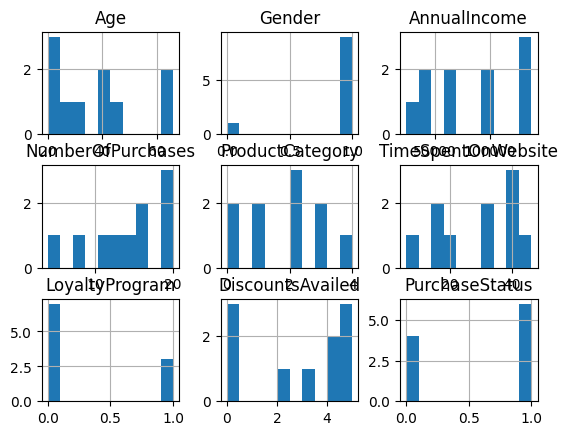

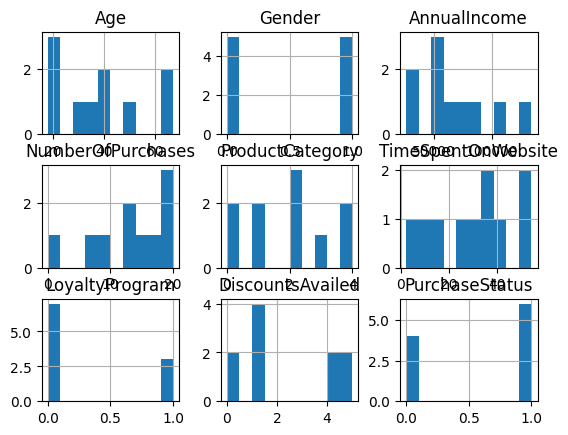

In [21]:
# Step-4 : We will now analyze the data
#Getting histogram based on the first 10 values and last 10 values
print(data.head(10).hist())
print(data.tail(10).hist())

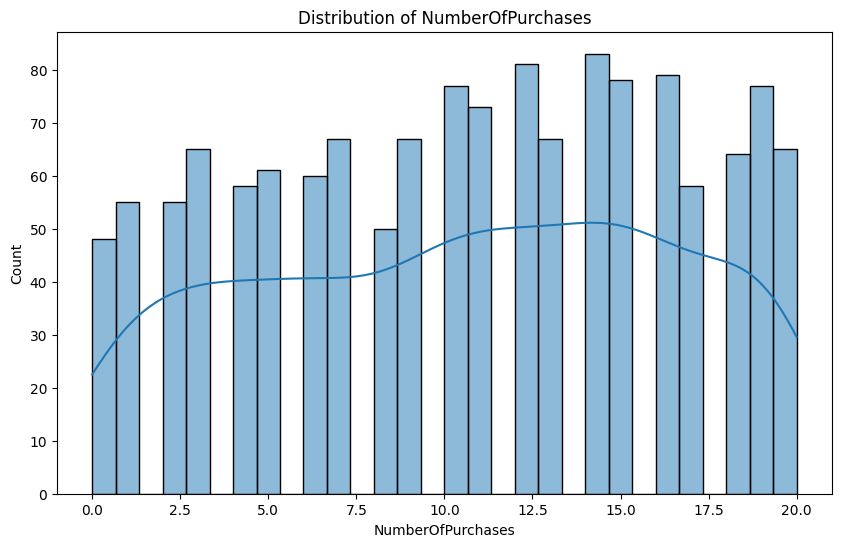

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['NumberOfPurchases'], bins=30, kde=True)
plt.title('Distribution of NumberOfPurchases')
plt.show()

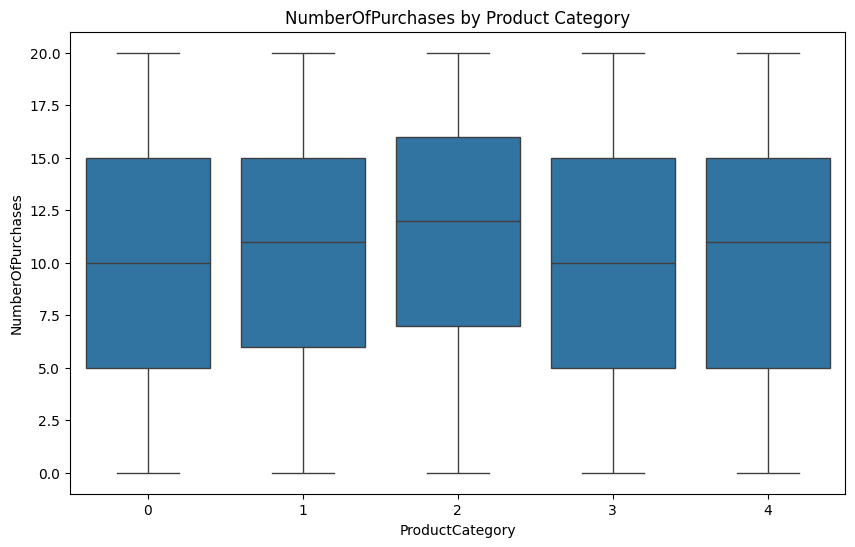

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCategory', y='NumberOfPurchases', data=data)
plt.title('NumberOfPurchases by Product Category')
plt.show()

<Axes: xlabel='Age', ylabel='AnnualIncome'>

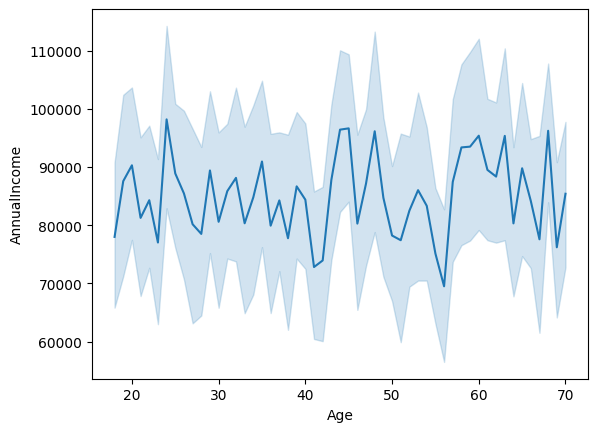

In [24]:
# draw lineplot 
sns.lineplot(x="Age", y="AnnualIncome", data=data)

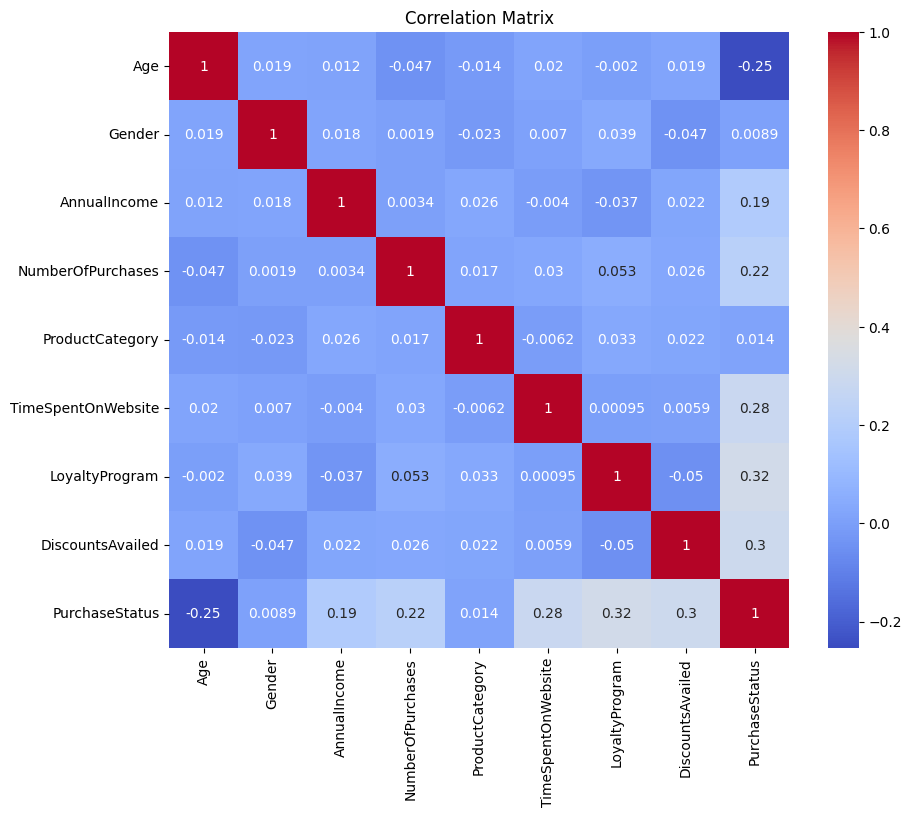

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

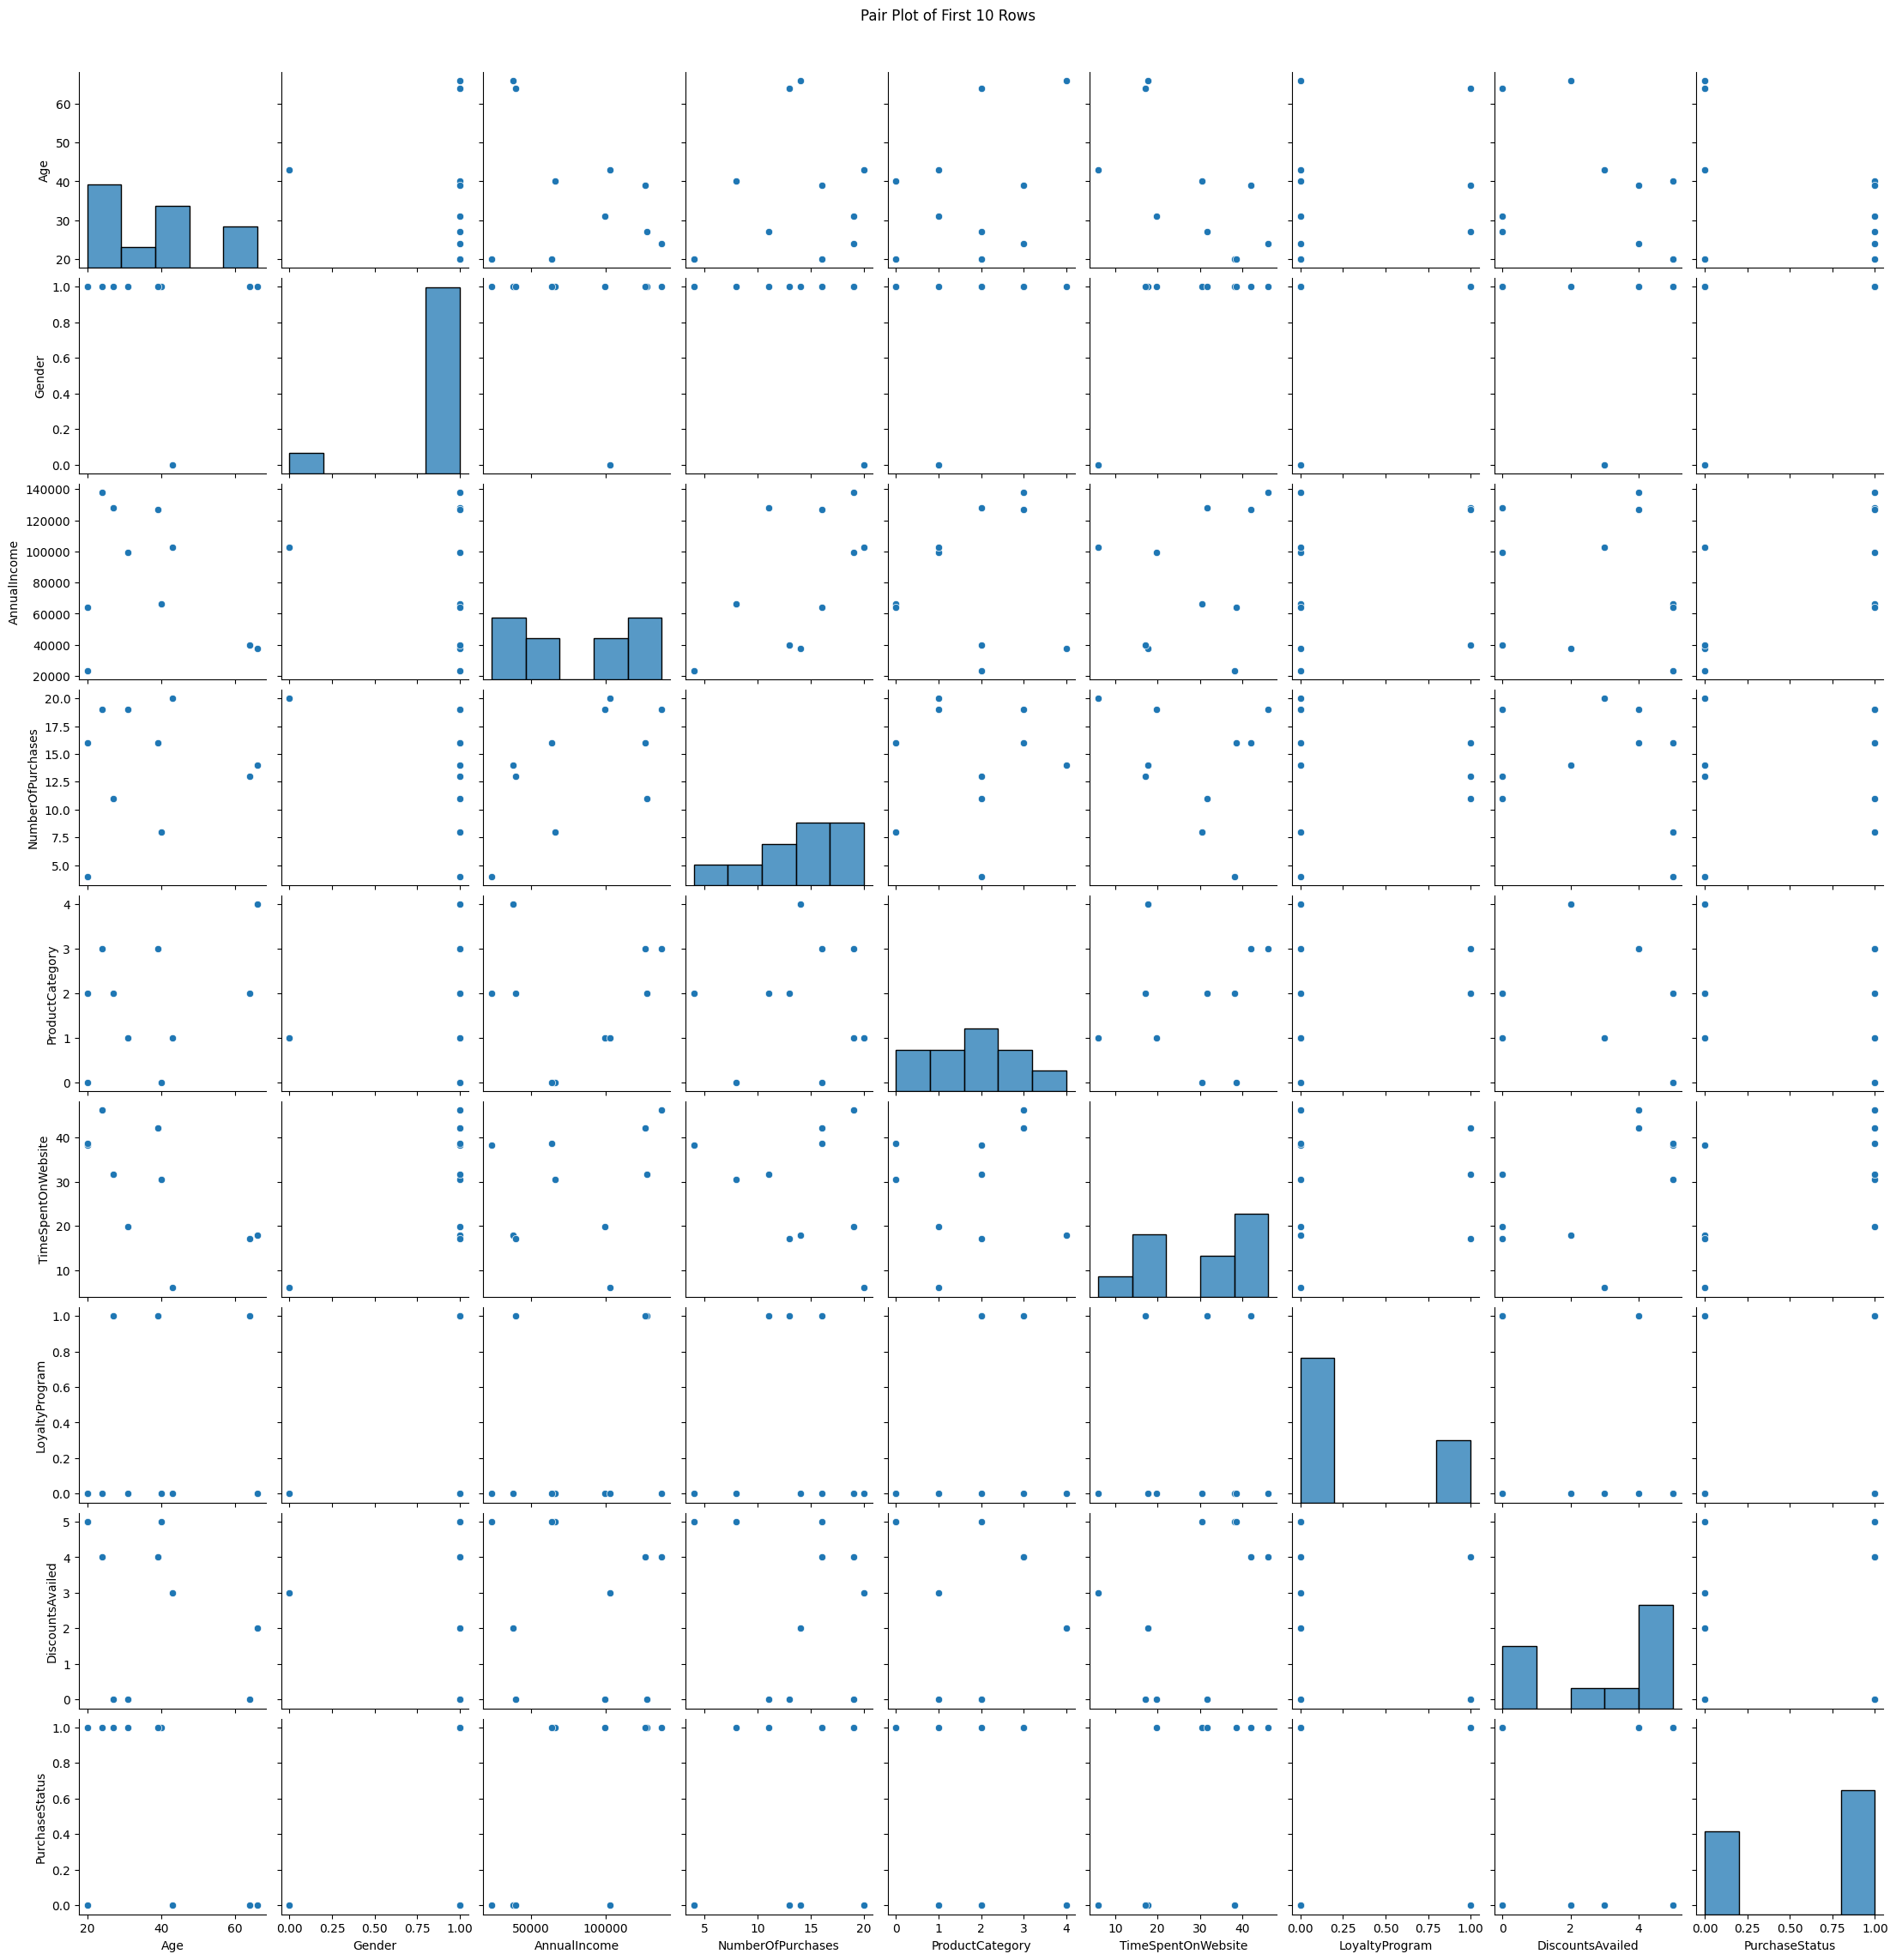

In [36]:
#Step-5 : Visualizing the data
#Pair plots
subset_data = data.head(10)
# Create a pair plot for the first 10 rows
sns.pairplot(subset_data)
plt.suptitle('Pair Plot of First 10 Rows', y=1.02)
plt.show()

<Axes: ylabel='count'>

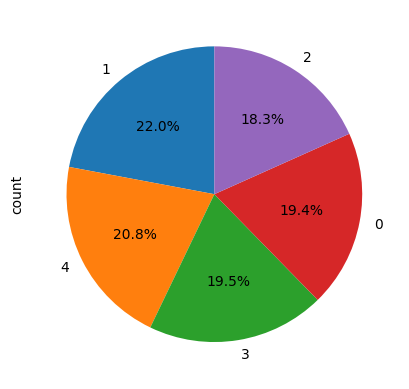

In [38]:
data['ProductCategory'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90)